In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## For pearson's correlation
from scipy.stats import pearsonr

Covariance:   22.666666666666664
Correlation:  (0.7094289771951878, 0.021575164034828447)
Var x:  16.88888888888889
Var y:  60.44444444444444


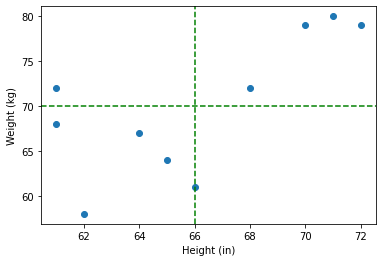

In [12]:
heights = np.array([68, 62, 64, 61, 70, 66, 61, 65, 71, 72])
weights = np.array([72, 58, 67, 72, 79, 61, 68, 64, 80, 79])

heights = heights
weights = weights

plt.scatter(x=heights, y=weights)

plt.axvline(heights.mean(), color="g", linestyle="--")
plt.axhline(weights.mean(), color="g", linestyle="--")

plt.xlabel("Height (in)")
plt.ylabel("Weight (kg)")

x = heights
y = weights

print("Covariance:  ", np.cov(x, y)[0, 1])
print("Correlation: ", pearsonr(x, y))

print("Var x: ", x.var(ddof=1))
print("Var y: ", y.var(ddof=1))

-120.06666666666665


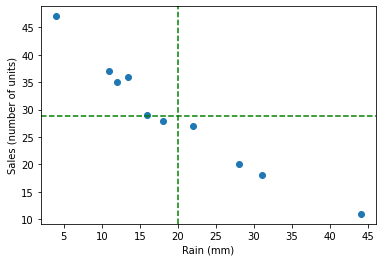

In [3]:
sales = np.array([47, 37, 35, 36, 29, 28, 27, 20, 18, 11])
rain  = np.array([4, 11, 12, 13.5, 16, 18, 22, 28, 31, 44])

plt.scatter(x=rain, y=sales)

plt.axvline(rain.mean(), color="g", linestyle="--")
plt.axhline(sales.mean(), color="g", linestyle="--")

plt.xlabel("Rain (mm)")
plt.ylabel("Sales (number of units)")
print(np.cov(sales, rain)[0, 1])

[[108.96037381 126.66135086]
 [126.66135086 292.55110514]]
Var x:  108.96037
Var y:  292.55112


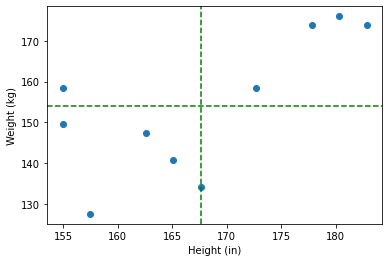

In [6]:
heights = np.array([68, 62, 64, 61, 70, 66, 61, 65, 71, 72], dtype=np.float32)
weights = np.array([72, 58, 67, 72, 79, 61, 68, 64, 80, 79], dtype=np.float32)

heights *= 2.54
weights *= 2.2

plt.scatter(x=heights, y=weights)

plt.axvline(heights.mean(), color="g", linestyle="--")
plt.axhline(weights.mean(), color="g", linestyle="--")

plt.xlabel("Height (in)")
plt.ylabel("Weight (kg)")

x = heights
y = weights

print(np.cov(x, y))

print("Var x: ", x.var(ddof=1))
print("Var y: ", y.var(ddof=1))

In [13]:
## Calculating rank
heights = np.array([68, 62, 64, 61, 70, 66, 61, 65, 71, 72], dtype=np.float32)
tmp = np.argsort(heights)

In [14]:
tmp

array([3, 6, 1, 2, 7, 5, 0, 4, 8, 9])

In [15]:
rank = np.argsort(tmp)

In [16]:
rank

array([6, 2, 3, 0, 7, 5, 1, 4, 8, 9])

### Spearman's rank correlation

In [17]:
heights = np.array([68, 62, 64, 61, 70, 66, 61, 65, 71, 72], dtype=np.float32)
weights = np.array([72, 58, 67, 72, 79, 61, 68, 64, 80, 79], dtype=np.float32)

height_rank = heights.argsort().argsort()
weight_rank = weights.argsort().argsort()

pearsonr(height_rank, weight_rank)

(0.5636363636363635, 0.08972402831709138)

In [18]:
height_rank

array([6, 2, 3, 0, 7, 5, 1, 4, 8, 9])

In [19]:
weight_rank

array([5, 0, 3, 6, 7, 1, 4, 2, 9, 8])

In [20]:
sales = np.array([47, 37, 35, 36, 29, 28, 27, 20, 18, 11])
rain  = np.array([4, 11, 12, 13.5, 16, 18, 22, 28, 31, 44])

sales_rank = sales.argsort().argsort()
rain_rank = rain.argsort().argsort()

In [21]:
sales_rank

array([9, 8, 6, 7, 5, 4, 3, 2, 1, 0])

In [22]:
rain_rank

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
pearsonr(sales_rank, rain_rank)

(-0.9878787878787876, 9.307459988956208e-08)

## Problem Solving - Scaler (paired ttest)

In [25]:
df = pd.read_csv('problem_solving.csv')

In [26]:
df

id  test_1  test_2
0      0      40      38
1      1      49      44
2      2      65      69
3      3      59      63
4      4      44      43
..   ...     ...     ...
132  132      45      44
133  133      46      42
134  134      40      35
135  135      60      66
136  136      79      84

[137 rows x 3 columns]

In [27]:
from scipy.stats import ttest_ind, ttest_rel

In [28]:
ttest_ind(df['test_1'], df['test_2'])

Ttest_indResult(statistic=-0.9288987997838147, pvalue=0.35376512874797605)

In [33]:
ttest_rel(df['test_1'], df['test_2'], alternative="less")

Ttest_relResult(statistic=-5.502886353508166, pvalue=8.979201768961535e-08)

In [30]:
df.describe()

id      test_1      test_2
count  137.000000  137.000000  137.000000
mean    68.000000   60.489051   62.430657
std     39.692569   17.080311   17.516293
min      0.000000   30.000000   27.000000
25%     34.000000   46.000000   48.000000
50%     68.000000   59.000000   62.000000
75%    102.000000   75.000000   77.000000
max    136.000000   89.000000   96.000000

### Problem solving: Store

In [34]:
from scipy.stats import poisson
p = 1 - poisson.cdf(2128, mu=2000)

In [35]:
p

0.0022062361562620314

## KS-test for checking normality

In [46]:
data = np.array(df["test_1"])

mu = data.mean()
sigma = data.std()

data_z = (data - mu)/sigma

<AxesSubplot:ylabel='Count'>

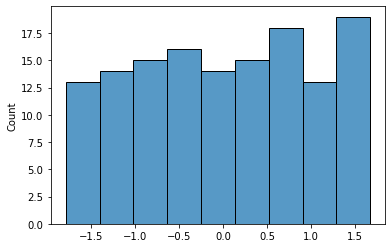

In [47]:
sns.histplot(data_z)

In [48]:
from scipy.stats import kstest, norm

In [50]:
kstest(data_z, norm.cdf)

KstestResult(statistic=0.07684184515523196, pvalue=0.3745342725112758)